In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
#from scipy.special import ellipk
from mpmath import ellipk
import os 
from mpl_toolkits import mplot3d
from scipy.optimize import fmin_cg, fmin_tnc, curve_fit, newton, bisect, fsolve
from SourcesTBG import *
from scipy.misc import derivative as scider

In [2]:
# BASE_PATH = "/data1/shankar/symmspectra/"
# if not os.path.exists(BASE_PATH):
#     raise(Exception("CHECK THE BASE PATH"))

TO_DEGREE = 1.0/0.018326
IN_RADIAN = np.pi/180
vFpar = 4.31074647887324
wpar=0.11
BANDS = 8

In [3]:
# def get_spectrum(kxi,kyi,thetai):
#     filename = 'kx' + str(kxi) + 'ky' + str(kyi) + 'theta' + str(thetai) + '.npy'
#     return np.load(os.path.join(BASE_PATH + filename))

In [4]:
#angle_set = np.linspace(0.5*0.018326, 1.5*0.018326, 21)
#kx = np.linspace(-0.1, 0.1, 200)
#ky = np.linspace(-0.1, 0.1, 200)

# angle_set = np.load(os.path.join(BASE_PATH + 'angle_set.npy'))
# kxlist = np.load(os.path.join(BASE_PATH + 'kxlist.npy'))
# kylist = np.load(os.path.join(BASE_PATH + 'kylist.npy'))

In [5]:
#get_spectrum(2,5,3)

array([-0.8465276 , -0.65111507, -0.56700069, -0.33785859,  0.35631813,
        0.51334902,  0.69628184,  0.83655297])

In [6]:
#kxlist[100]

0.0005025125628140698

Text(0.5, 1.0, 'kx = 0.0005025125628140698')

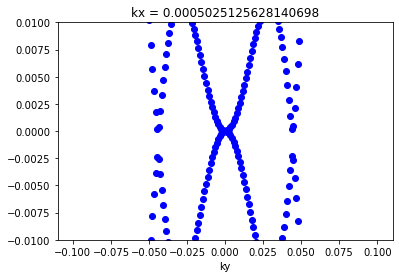

In [7]:
# fig = plt.figure()
# thetai = 10
# for kyi,kyval in enumerate(kylist):
#     spectrum = get_spectrum(100,kyi,thetai)
#     for energy in spectrum:
#         plt.scatter(kyval,energy,c='blue')

# plt.xlabel('ky')
# plt.ylim([-0.01,0.01])
# plt.title('kx = ' + str(kxlist[100]))

<ipython-input-8-8a8e5ead2963>:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f80167f10c0> has a label of '_Lawda' which cannot be automatically added to the legend.
  plt.legend(labels)
<ipython-input-8-8a8e5ead2963>:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f80167f3ac0> has a label of '_Lawda' which cannot be automatically added to the legend.
  plt.legend(labels)
<ipython-input-8-8a8e5ead2963>:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8016805330> has a label of '_Lawda' which cannot be automatically added to the legend.
  plt.legend(labels)
<ipython-input-8-8a8e5ead2963>:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8016807b50> has a label of '_Lawda' which cannot be automatically added to the legend.
  plt.legend(labels)
<ipython-input-8-8a8e5ead2963>:10: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8016826ef0> has a label of '_Lawda' which cannot be automatically added to the

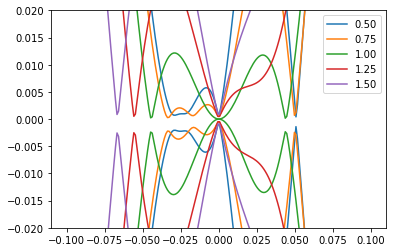

In [8]:
# labels = []
# for thetai, thetaval in enumerate(angle_set):
#     if(thetai%5 == 0):
#         cols = 'C' + str(thetai//5)
#         spectrumkx0 = np.array([get_spectrum(100,kyi,thetai) for kyi in range(len(kylist))])
#         labels += ["{0:0.2f}".format(thetaval*TO_DEGREE), '_Lawda']
#         for i in range(3,5):
#             plt.plot(kylist,spectrumkx0[:,i], color = cols)
    
# plt.legend(labels)
# plt.ylim(-0.02,0.02)
# plt.show()
    

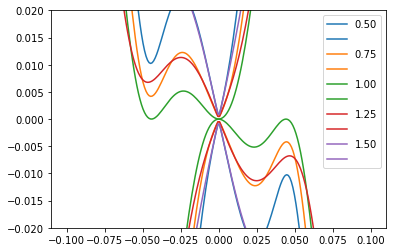

In [9]:
# labels = []
# for thetai, thetaval in enumerate(angle_set):
#     if(thetai%5 == 0):
#         cols = 'C' + str(thetai//5)
#         spectrumky0 = np.array([get_spectrum(kxi,100,thetai) for kxi in range(len(kxlist))])
#         labels += ["{0:0.2f}".format(thetaval*TO_DEGREE), None]
#         for i in range(3,5):
#             plt.plot(kxlist,spectrumky0[:,i], color = cols)
    
# plt.legend(labels)
# plt.ylim(-0.02,0.02)
# plt.show()

In [10]:
x = []
y = []
z = []
thetai = 10
band = 4
for kxi,kxval in enumerate(kxlist):
    for kyi,kyval in enumerate(kylist): 
        x += [kxval]
        y += [kyval]
        #evals = get_spectrum(kxi,kyi,thetai)
        z += [get_spectrum(kxi,kyi,thetai)]
        
x = np.array(x)
y = np.array(y)
z = np.array(z)



### syntax: view_init(elev, azim)

Parameters: 

    ‘elev’ stores the elevation angle in the z plane.
    ‘azim’ stores the azimuth angle in the x,y plane.

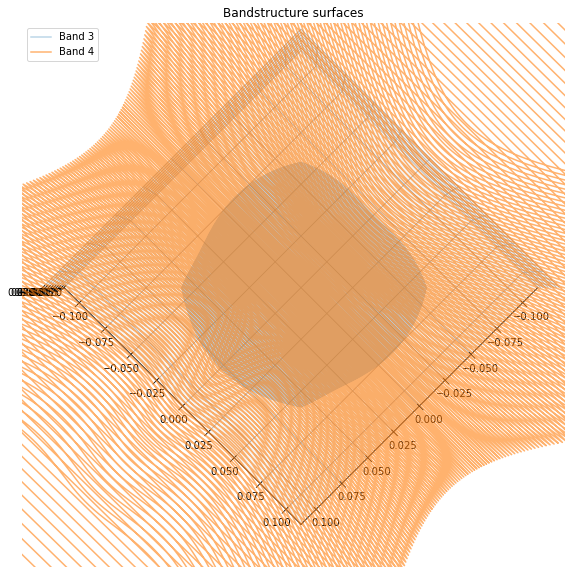

In [11]:
plt.close('all')
fig = plt.figure(figsize = (10, 10))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
col_alpha = 0.3
# plotting
#ax.plot_surface(x, y, z[:,3])
ax.plot3D(x, y, z[:,3], alpha = col_alpha, label = 'Band 3')
ax.plot3D(x, y, z[:,4], alpha = col_alpha+0.3, label = 'Band 4')
ax.set_zlim3d(-0.02,0.02)
ax.set_title('Bandstructure surfaces')
ax.view_init(90, 44)
#ax.view_init(10,120)
plt.legend()
plt.show()

(-0.05, 0.0)

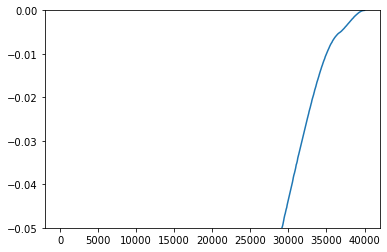

In [12]:
plt.plot(np.arange(len(z)),np.sort(z[:,3]))
plt.ylim(-0.05,0)

In [13]:
print(angle_set[10] * TO_DEGREE)

1.0000000000000002


In [15]:
x0 = np.asarray((-0.05,0))
thetai = 10

def funcf(x): 
    kxval,kyval = x
    return generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*TO_DEGREE, 
                                                       kx_fixed = kxval, ky_fixed=kyval, symmetric=True)[4]

#mincg = fmin_cg(funcf, x0, fprime=None, args=())

mintnc = fmin_tnc(funcf, x0, fprime=None, args=(), approx_grad=True, disp = 5)

#print(mincg)

In [16]:
%%timeit
funcf((0,-0.2))

50.4 µs ± 839 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Look to find the minimum of the first derivative

$$ \frac{\delta_h[f](x)}{h} - f^\prime(x) = \mathcal{O}(h^2) $$ 
$$ \frac{\delta_h[f](x)}{h} = f(x+h/2) - f(x-h/2)$$

In [16]:
testf = lambda x: x**3
testf2 = lambda x: np.sin(x)
testf3 = lambda x: np.abs(x)
xnought = 0
def derivative(f,x,epsilon = 1e-8, maxiter = 1000,hstart = 2**-3,conv = True):
    '''f is a callable that returns f(x)'''
    if conv:
        h = hstart
        der = (f(x+h/2.0) - f(x-h/2.0))/h
        oldder = der
        diffs = 1
        itern = 0
        wrench = 1.0
        h /= 2
        while(diffs > epsilon and itern <= maxiter):
            h /= 2
            olddiffs = diffs
            der = wrench*((f(x+h/2.0) - f(x-h/2.0))/h) + (1-wrench)*oldder
            diffs = np.abs(oldder - der)
            oldder = der
            itern += 1
            if diffs > olddiffs:
                wrench /= 2.0
                #h /= 2
                
            if itern > maxiter:
                Error_Message = "Derivative did not converge in " + str(itern) + " iterations\n"
                Error_Message += " x = " + str(x) + " h = " + str(h) 
                Error_Message += " wrench = " + str(wrench)
                print(Error_Message)
                #der = 1e5
        #print(" wrench = " + str(wrench))
        #print(" itern = "  + str(itern))

        return der
    else:
        h = hstart
        der = (f(x+h/2.0) - f(x-h/2.0))/h
        oldder = der
        diffs = 1
        itern = 0
        while(diffs > epsilon and itern <= maxiter):
            h /= 2
            der = (f(x+h/2.0) - f(x-h/2.0))/h
            diffs = np.abs(oldder - der)
            oldder = der
            itern += 1
            if itern > maxiter:
                Error_Message = "Derivative did not converge in " + str(itern) + " iterations\n"
                Error_Message += "x = " + str(x) + " h = " + str(h)
                print(Error_Message)
                der = 1e5

        return der




print(derivative(testf,5))
print(derivative(testf2,np.pi/2))
print(derivative(testf3, 0.001))
print(derivative(testf3, -0.001))
print(derivative(testf3, 0))

    
def secondder(f,x,epsilon = 1e-6, maxiter = 100,hstart = 2**-3):
    '''f is a callable that returns f(x)'''
    h = hstart
    der = (f(x+h) + f(x-h) - 2.0*f(x))/(h**2)
    oldder = der
    diffs = 1
    itern = 0
    while(diffs > epsilon and itern <= maxiter):
        h /= 2
        der = (f(x+h) + f(x-h) - 2.0*f(x))/(h**2)
        diffs = np.abs(oldder - der)
        oldder = der
        itern += 1
        if itern > maxiter:
            Error_Message = "Derivative did not converge in " + str(itern) + " iterations\n"
            Error_Message += "x = " + str(x) + " h = " + str(h)
            print(Error_Message)
            der = 1e5
            
    return der  


#print(secondder(testf3, 0.001), scider(testf3,0.001, n=2))    
#print(secondder(testf2, np.pi/2), scider(testf2,np.pi/2, n=2))  
#print(secondder(testf, 0.001), scider(testf,0.001, n=2))  

75.00000000093132
0.0
1.4416281870564032e-07
-1.4416281870564032e-07
0.0


In [18]:
#fmin_cg(lambda x: derivative(testf3,x), 0)
res = fmin_tnc(lambda x: derivative(testf3,x), x0 = (0.1,), fprime = None, approx_grad=True, disp = 5)
print(res)

(array([0.1]), 2, 0)


#### This does partial derivatives

In [284]:
def forpartialx(f,yfixed): 
    '''f is a callable that returns f(x,y)''' 
    #f(x) = lambda x: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*TO_DEGREE, 
    #                                                  kx_fixed = x, ky_fixed=y, symmetric=True)[4]
    return lambda x: f(x,yfixed)

def forpartialy(f,xfixed): 
    return lambda y: f(xfixed,y)

def testparf(x,y):
    return x**2 - y**4

x0, y0 = (0,2)
print(derivative(forpartialx(testparf, yfixed = y0), x0))
print(derivative(forpartialy(testparf, xfixed = x0), y0))
print(secondder(forpartialy(testparf,xfixed = x0), y0))
print(scider(forpartialy(testparf,xfixed = x0), y0, n=2, dx = 1e-3))
    
    

0.0
-32.000000001862645
-48.00000011920929
-48.000001996229


In [18]:
def pdvx(x,y, thetai=1.05, hstart = 2**-3): 
    return derivative(lambda x: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*IN_RADIAN, 
                                               kx_fixed = x, ky_fixed=y, symmetric=True)[4], x, hstart = hstart)
def pdvy(x,y,thetai = 1.05,hstart = 2**-3):
    return derivative(lambda y: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*IN_RADIAN, 
                                               kx_fixed = x, ky_fixed=y, symmetric=True)[4], y, hstart = hstart)
print(pdvx(-0.04419646,0))
print(pdvy(-0.04419646,0))
#print(pdvx(0,0),pdvy(0,0))
print(pdvx(-0.02323344,0),pdvy(-0.02323344,0))
print(pdvx(-0.04419646,0),pdvy(-0.04419646,0))

0.00014793196738632775
1.0805605237452648e-06
8.390312245865061e-06 0.015870663762001413
0.00014793196738632775 1.0805605237452648e-06


### pdvx and pdvy return the required partial derivatives. 
Now look in the entire range kx,ky to find where kx and ky are both smaller than epsilon

In [47]:
# extrema = []
# epsilon = 1e-3
# for kxi,kxval in enumerate(kxlist):
#     for kyi,kyval in enumerate(kylist):
#         if np.abs(pdvy(kxval,kyval)) < epsilon:
#             if np.abs(pdvx(kxval,kyval)) < epsilon: 
#                 extrema += [(kxi,kyi)]
        

In [ ]:
#extrema

In [ ]:
# extrema = []
# epsilon = 1e-4
# fineness = int(1e4)
# fineklist = np.linspace(-0.1,0.1,fineness)
# for kxi,kxval in enumerate(fineklist):
#     for kyi,kyval in enumerate(fineklist):
#         if np.abs(pdvy(kxval,kyval)) < epsilon:
#                 extrema += [(kxval,kyval)]

### Gradient descent for $|{\partial_x E}|$ and $|{\partial_y E}|$ 

In [91]:
xGuess = np.asarray((-0.0071,0.0038))
thetai = 0.5 #Enter angle in degrees

def funcfx(xG,thetai): 
    kxval,kyval = xG
    return np.abs(pdvx(kxval,kyval,thetai = thetai))

def funcfy(xG,thetai): 
    kxval,kyval = xG
    return np.abs(pdvy(kxval,kyval,thetai = thetai))

def funcfadd(xG,thetai):
    kxval,kyval = xG
    return 1e6*(np.abs(pdvx(kxval,kyval,thetai = thetai)) + np.abs(pdvy(kxval,kyval,thetai = thetai)))

def funcfsquare(xG,thetai):
    kxval,kyval = xG
    return 1e6*((pdvx(kxval,kyval,thetai = thetai))**2 + (pdvy(kxval,kyval,thetai = thetai))**2)

def funcfsquareNO(xG,thetai):
    kxval,kyval = xG
    return 1.0*((pdvx(kxval,kyval,thetai = thetai))**2 + (pdvy(kxval,kyval,thetai = thetai))**2)

newtsearch = newton(funcfy, xGuess, fprime=None, args=(thetai,))
#graddesckx = fmin_cg(funcf, xGuess, fprime=None, args=(thetai,))
newtckx = fmin_tnc(funcfx, xGuess, fprime=None, args=(thetai,), approx_grad=True, disp = 5)
newtcky = fmin_tnc(funcfy, xGuess, fprime=None, args=(thetai,), approx_grad=True, disp = 5)
newtckadd = fmin_tnc(funcfadd, xGuess, fprime=None, args=(thetai,), approx_grad=True, disp = 5)
#graddescadd = fmin_cg(funcfadd, xGuess, fprime=None, args=(thetai,))
newtcsquare = fmin_tnc(funcfsquare, xGuess, fprime=None, args=(thetai,), approx_grad=True, disp = 5)
#print(graddesckx)
print(newtsearch, '\n')
print(newtckx,'\n',newtcky, '\n', newtckadd, '\n', newtcsquare)

[-0.00710344  0.00380343] 

(array([-0.00709999,  0.00380001]), 9, 2) 
 (array([-0.0071,  0.0038]), 3, 0) 
 (array([-0.00709999,  0.00380001]), 9, 2) 
 (array([-0.00709999,  0.00380001]), 9, 2)


In [92]:
xX, yX = newtckx[0]
xY, yY = newtcky[0]
xA,yA = newtckadd[0]
xS,yS = newtcsquare[0]
xN, yN = newtsearch
print("Minimizing gradX: ", pdvx(xX,yX,thetai), pdvy(xX,yX,thetai))
print("Minimizing gradY: ", pdvx(xY,yY,thetai), pdvy(xY,yY,thetai))
print("Minimizing gradX+Y: ", pdvx(xA,yA,thetai), pdvy(xA,yA,thetai))
print("Minimizing gradX+YSQUARE: ", pdvx(xS,yS,thetai), pdvy(xS,yS,thetai))
print("NewtonRaphson:, ", pdvx(xN,yN,thetai), pdvy(xN,yN,thetai))


Minimizing gradX:  0.0 0.0
Minimizing gradY:  -1.0 0.0
Minimizing gradX+Y:  0.0 0.0
Minimizing gradX+YSQUARE:  0.0 0.0
NewtonRaphson:,  -0.02899932861328125 0.0


In [519]:
xGuess = np.asarray((-0.0071,0.0038))
thetai = 0.5 #Enter angle in degrees
thetaset = np.linspace(0.5,1.2,100)
saddles = []
for thetai in thetaset:
    xGuess = fmin_tnc(funcfsquare, xGuess, fprime=None, args=(thetai,), approx_grad=True, disp = 5)[0]
    #oldnewtsearch = newton(funcfy, xGuess, fprime=None, args=(thetai,))
    #for i in range(100):
    #    newtsearch = newton(funcfx, oldnewtsearch, fprime = None, args = (thetai,))  
    #    oldernewtsearch = 1.0 * newtsearch
    #    newtsearch = newton(funcfy, oldernewtsearch, fprime = None, args = (thetai,))
    #    oldnewtsearch = 1.0 * newtsearch
    #saddles += [newtsearch]
    saddles += [xGuess]
saddles = np.array(saddles)
# xN, yN = newtsearch
# print(newtsearch,oldnewtsearch)
# print("NewtonRaphson: ", pdvx(xN,yN,thetai), pdvy(xN,yN,thetai))

In [121]:
#np.save(os.path.join(BASE_PATH,'angles'), thetaset)
#np.save(os.path.join(BASE_PATH,'saddles'), saddles)

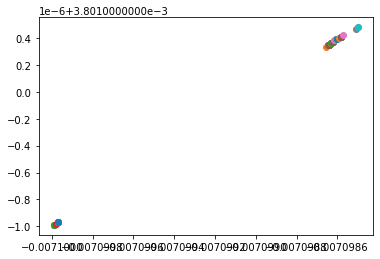

In [131]:
#plt.scatter(saddles[0],saddles[1])
for data in saddles:
    plt.scatter(data[0],data[1])

In [157]:
x0 = (np.pi,0)
def rand2dimfunc(xy):
    x,y = xy
    return (x*y**2 - x**2 * y)
def forpdvsrand(xy):
    x,y = xy
    partialx = derivative(lambda x1: rand2dimfunc((x1,y)) , x)
    partialy = derivative(lambda y1: rand2dimfunc((x,y1)), y)
    return ([partialx, partialy])

forpdvsrand(x0)
#print(derivative(forpartialx(rand2dimfunc, yfixed = y0), x0))
#search = newton(rand2dimfunc, x0, fprime=None)
#searchx = newton(forpartialx, x0)
search2 = fsolve(forpdvsrand, x0)
print(search2)
forpdvsrand(search2)


[1.63736271e-20 0.00000000e+00]


[0.0, 0.0]

In [490]:
def collpars(xy, thetai):
    x,y = xy
    return 1e5*np.array([pdvx(x,y,thetai,hstart = 2**-12), pdvy(x,y,thetai,hstart = 2**-8)])

xGuess = np.asarray((-0.0071,0.0038))
#xGuess = np.asarray((-1,0.1))
thetai = 0.5 #Enter angle in degrees
thetaset = np.linspace(0.5,1.2,100)
saddlesALT = []

#ALTsaddle = fsolve(collpars, xGuess, fprime = None, args = (thetai,), full_output = True)
#print(ALTsaddle)
#print(collpars(ALTsaddle[0],thetai))
for thetai in thetaset:
    xGuess = fsolve(collpars, xGuess, fprime = None, args = (thetai,), full_output = False)
    saddlesALT += [xGuess]
    
saddlesALT = np.array(saddlesALT)
#xN, yN = newtsearch
# print(newtsearch,oldnewtsearch)
# print("NewtonRaphson: ", pdvx(xN,yN,thetai), pdvy(xN,yN,thetai))
#np.save(os.path.join(BASE_PATH,'angles'), thetaset)
#np.save(os.path.join(BASE_PATH,'saddles'), saddlesALT)

Text(0, 0.5, '$E_v$')

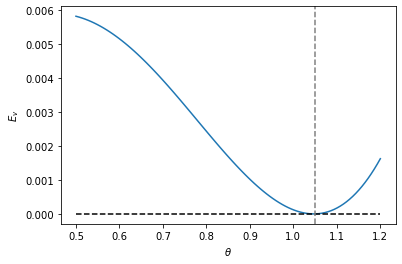

In [546]:
E = []
for i, thetai in enumerate(thetaset):
    x,y = saddlesALT[i]
    Ev = generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*IN_RADIAN, 
                                               kx_fixed = x, ky_fixed=y, symmetric=True)[4]
    E += [Ev]
plt.plot(thetaset,E)
plt.plot(thetaset,thetaset*0.0, '--', color = 'black')
plt.axvline(1.05, ls = '--', color = 'gray')
plt.xlabel('$\\theta$')
plt.ylabel(r'$E_v$')
#plt.ylim(0,1e-2)
#plt.savefig(os.path.join('EVvsTheta.jpg'))


0.6909090909090909 -0.007410875902051998 0.0039456611603129145
0.004065960989214016 0.004065960989214016


Text(0.5, 0, '$\\theta$ in degrees')

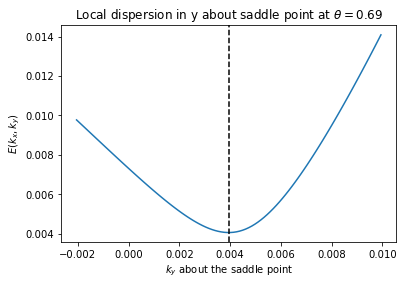

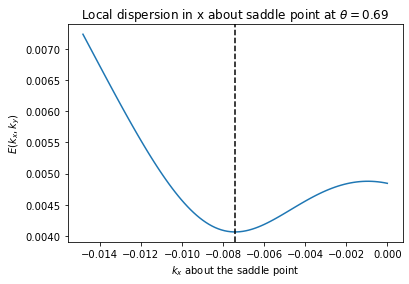

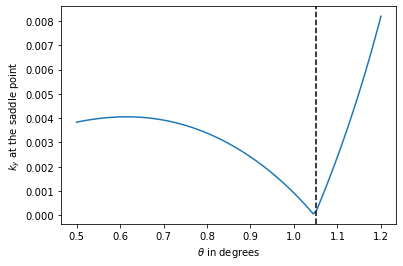

In [541]:
index = 27
thetai = thetaset[index]
x,y = saddlesALT[index]
print(thetai,x,y)
print(retEyatx(x,thetai)(y), retExaty(y,thetai)(x))

fig = plt.figure()
padding = 6e-3
localky = np.linspace(y-padding,y+padding,100)
evalsy = [retEyatx(x,thetai)(yval) for yval in localky]
plt.plot(localky, evalsy)
plt.axvline(y,ls = '--', color = 'black')
plt.ylabel(r'$E(k_x,k_y)$')
plt.xlabel(r'$k_y$ about the saddle point')
plt.title('Local dispersion in y about saddle point' + ' at $\\theta = $' + str(int(thetai*1000)/1000))

fig = plt.figure()
localky = y
padding = 1 * x 
localkx = np.linspace(x-padding,x+padding,100)
evalsx = [retExaty(y,thetai)(xval) for xval in localkx]
plt.plot(localkx, evalsx)
plt.axvline(x,ls = '--', color = 'black')
plt.ylabel(r'$E(k_x,k_y)$')
plt.xlabel(r'$k_x$ about the saddle point')
plt.title('Local dispersion in x about saddle point' + ' at $\\theta = $' + str(int(thetai*1000)/1000))

fig2 = plt.figure()
plt.plot(thetaset,saddlesALT[:,1])
plt.axvline(1.05,ls = '--', color = 'black')
plt.ylabel(r'$k_y$ at the saddle point')
plt.xlabel(r'$\theta$ in degrees')

In [343]:
index = 54
print(thetaset[index], E[index], retEyatx(saddlesALT[index,0],thetai = thetaset[index])(saddlesALT[index,1]), 
      saddlesALT[index])
print(secondder(retEyatx(saddlesALT[index,0],thetai = thetaset[index]), saddlesALT[index,1]))
print(derivative(retEyatx(saddlesALT[index,0],thetai = thetaset[index]), saddlesALT[index,1]), 
              pdvy(saddlesALT[index,0],saddlesALT[index,1],thetaset[index]))
scider(retEyatx(saddlesALT[index,0],thetai = thetaset[index]),saddlesALT[index,1], dx=1e-5, n=2)

1.0454545454545454 1.6266506555613804e-07 1.6266506555613804e-07 [ 2.50787464e-08 -7.06403655e-05]
0.0
-1.0089255819689669e-12 -1.0089255819689669e-12


-65.19498875269386

## copying the curve fitting code

In [552]:
#magic angle

index = 77
Ev = E[index]
print(Ev)
def approximate_dispersion_magic(kxy, alpha, beta, gamma, kappa):
    '''note that this function contains exact value of 
    E_v calculated for magic angle'''
    kx = kxy[:,0]
    ky = kxy[:,1]
    return Ev-alpha*kx**2+beta*ky**2+gamma*kx*ky**2+kappa*ky**4


vFpar = 4.31074647887324
wpar=0.11
#Thetapar = 0.018326
thetai = thetaset[index]
kx0,ky0 = saddlesALT[index]
#kx_vec = np.linspace(-0.0003, -0.0001, 100)
#ky_vec = np.linspace(-0.0004, 0.0004, 100)
kx_vec = np.linspace(0.9*kx0, 1.1*kx0, 100)
ky_vec = np.linspace(0.9*ky0, 1.1*ky0, 100)
#kxy - origin at the saddle point
kxy_data = np.array([[kx_vec[i]-kx0, ky_vec[j]-ky0] for i in range(len(kx_vec)) for j in range(len(ky_vec))])
#print(kxy_data[:,0])
spectrum_data = [generate_spectrum_Twisted_graphene_single_point(vF=vFpar, 
                                        w=wpar, Theta=thetai*IN_RADIAN,  
                                    kx_fixed = kxy_data[i][0]+kx0, 
                                    ky_fixed=kxy_data[i][1]+ky0, symmetric=True)[4] for i in range(len(kxy_data))]
#print(spectrum_data)
# print(curve_fit(f=approximate_dispersion_magic, 
#                          xdata = kxy_data, 
#                          ydata = spectrum_data, 
#                          p0 = (0.2, 0.2, 0.1, 0.1), 
#                          sigma=None, 
#                          absolute_sigma=False, 
#                          check_finite=True,  
#                          method=None, 
#                          jac=None))
print('this is the answer for alpha, beta, gamma, kappa: ', list(curve_fit(f=approximate_dispersion_magic, 
                         xdata = kxy_data, 
                         ydata = spectrum_data, 
                         p0 = (-0.2, -0.2, 0.1, 0.1), 
                         sigma=None, 
                         absolute_sigma=False, 
                         check_finite=True,  
                         method=None, 
                         jac=None)[0]))

4.1696928087608966e-07
this is the answer for alpha, beta, gamma, kappa:  [-47.95353189076915, 208.77834382452986, -1894659.6978531147, 0.1]


# Brute Force search !!!

In [ ]:
# extrema = []
# epsilon = 1e-4
# fineness = int(1e4)
# fineklist = np.linspace(-0.1,0.1,fineness)
# for kxi,kxval in enumerate(fineklist):
#     for kyi,kyval in enumerate(fineklist):
#         if np.abs(pdvy(kxval,kyval)) < epsilon:
#                 extrema += [(kxval,kyval)]

In [118]:
CURRENT_PATH = "/data1/shankar/saddles/"
if not os.path.exists(CURRENT_PATH):
    raise(Exception("CHECK THE BASE PATH"))

In [ ]:
filename = os.path.join(CURRENT_PATH + "test.txt")
data = [(1,2), (2,3)]
for datavals in data:
    with open(filename, "a") as file1:
        file1.write(str(datavals)+'\n')

#### Searching range: 
$ k_x \in (-0.06, 0.01) $

$ k_y \in (-0.03, 0.03) $


In [ ]:
# extremay = []
# extremaboth = []
# epsilon = 1e-5
# fineness = int(1e4)
# filenamey = os.path.join(CURRENT_PATH + "extremay.txt")
# filenameboth = os.path.join(CURRENT_PATH + "extremaboth.txt")
# kxrange = np.linspace(-0.06,-0.02,fineness)
# kyrange = np.linspace(-0.025,0.025,fineness)
# for kyi,kyval in enumerate(kyrange):
#     for kxi,kxval in enumerate(kxrange):
#         if np.abs(pdvy(kxval,kyval)) < epsilon:
#                 extremay += [(kxval,kyval)]
#                 with open(filenamey, "a") as file1:
#                     file1.write(str((kxval,kyval))+'\n')
#                 if np.abs(pdvx(kxval,kyval)) < epsilon:
#                     extremaboth += [(kxval,kyval)]
#                     with open(filenameboth, "a") as file2:
#                         file2.write(str((kxval,kyval))+'\n')
                    

In [ ]:
kxval, kyval

In [ ]:
for points in extremay:
    x,y = points
    plt.scatter(x,y)

plt.savefig("derivativekyzero.jpg")    
plt.show()
                    

In [ ]:
pdvy(kxval,kyval)
pdvx(-0.1,0), pdvx(-0.02,0)

In [ ]:
derkxzero = newton(pdvy, 0.01, args = (0,))
derkxzero

In [ ]:
x = np.linspace(-0.0000001,0.0000001,int(1e2))
xargs = [(xval,0) for xval in x]
#[pdvx(arg1,arg2) for arg1,arg2 in np.array([(0,0),(0,1)])]
y = [pdvx(arg1,arg2) for arg1,arg2 in np.array(xargs)]
plt.plot(x,y)


### Second derivative

In [536]:
choice = 3

if choice == 1:
    betas = []
    for i, thetai in enumerate(thetaset):
        kx0,ky0 = saddlesALT[i]
        betaval = 0.5 * derivative(lambda y: pdvy(kx0,y,thetai),ky0)
        betas += [betaval]
elif choice == 2:
    betas = []
    for i, thetai in enumerate(thetaset):
        kx0,ky0 = saddles[i]
        betaval = 0.5 * secondder(retEyatx(kx,thetai),ky)
        betas += [betaval]
elif choice == 3:
    betas = []
    alphas = []
    for i, thetai in enumerate(thetaset):
        kx0,ky0 = saddlesALT[i]
        betaval = 0.5 * scider(retEyatx(kx0,thetai),ky0,n=2, dx=1e-7)
        alphaval = 0.5 * scider(retExaty(ky0,thetai),kx0,n=2, dx=1e-7)
        betas += [betaval]
        alphas += [alphaval]
else: 
    print("Invalid choice!!!!!!")
    
print("You used choice", choice)

You used choice 3


[-9.79000260e-05  5.64485199e-05] [220.81674867519695, 217.99643880549223, 215.19056042903296, 212.3849003170823, -32.27963027709974]


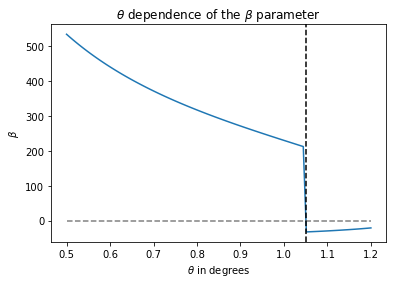

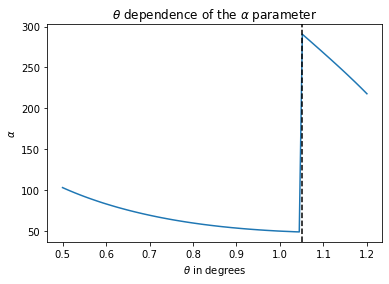

In [553]:
print(saddlesALT[77],betas[74:79])
#print(betas)
fig = plt.figure()
plt.plot(thetaset,betas)
plt.plot(thetaset,thetaset*0.0, '--', color = 'gray')
plt.axvline(1.05, ls = '--', color = 'black')
plt.title('$\\theta$ dependence of the $\\beta$ parameter')
plt.xlabel('$\\theta$ in degrees' )
plt.ylabel('$\\beta$')
plt.savefig('thetadependenceofbeta.jpg')
#plt.ylim(0,500)
fig2 = plt.figure()
plt.plot(thetaset,alphas)
plt.axvline(1.05, ls = '--', color = 'black')
plt.title('$\\theta$ dependence of the $\\alpha$ parameter')
plt.xlabel('$\\theta$ in degrees' )
plt.ylabel('$\\alpha$')
plt.savefig('thetadependenceofalpha.jpg')
#plt.ylim(0,500)

In [474]:
def retEyatx(x,thetai):
    return lambda y: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*IN_RADIAN, 
                                               kx_fixed = x, ky_fixed=y, symmetric=True)[4]

def retExaty(y,thetai):
    return lambda x: generate_spectrum_Twisted_graphene_single_point(vF=vFpar, w=wpar, Theta=thetai*IN_RADIAN, 
                                               kx_fixed = x, ky_fixed=y, symmetric=True)[4]

In [456]:
thetai = thetaset[77]
kx,ky = saddlesALT[77]
print(0.5*scider(retEyatx(kx,thetai),ky, dx = 2, n=1), pdvy(kx,ky,thetai))
print(secondder(retEyatx(kx,thetai), ky))

4.2899527531670145e-05 -3.2070213151769167e-10
0.0


In [415]:
print(saddlesALT[0],saddlesALT[-1])
#saddlesALT[:,1]
2**-8

[-0.00705455  0.00383207] [0.00035153 0.00819315]


0.00390625